# Занятие 2. Простая предобработка данных временных рядов
## Заполнение пропусков, агрегация, подготовка обучающих материалов
---
В этом занятии студенты познакомятся с базовыми техниками работы с реальными временными рядами.
# Теоретическая справка: Предобработка временных рядов

Почему предобработка — первый и обязательный шаг?  
Без неё модели дают неверные результаты, тесты стационарности искажаются, прогнозы «плывут».

### Основные задачи предобработки
1. Установление правильного временного индекса  
   → pd.to_datetime(), df.set_index('date', inplace=True), freq='D'/'M'/'H' и т.д.

2. Обработка пропусков (Missing Values)  
   | Метод                | Когда использовать                                   | Плюсы                          | Минусы                          |
   |----------------------|-------------------------------------------------------|--------------------------------|---------------------------------|
   | ffill / bfill    | Короткие пропуски, данные почти непрерывны           | Просто, быстро                 | Может «заморозить» значение     |
   | Линейная интерполяция| Плавно меняющиеся процессы (температура, продажи)   | Сохраняет тренд                | Плохо для резких скачков        |
   | Среднее/медиана      | Много шума, стационарный процесс                     | Уменьшает шум                  | Убирает реальные изменения      |
   | Модели импутации     | Длинные пропуски (>10–20%)                            | Наиболее точно                 | Сложнее в реализации            |

3. Агрегация и изменение частоты (resampling)  
   - Downsampling (из дневных → месячные): df.resample('M').sum() или .mean()  
   - Upsampling (из месячных → дневные): df.resample('D').ffill() или .interpolate()  
   Примеры:  
   → ежедневные продажи → еженедельные/месячные итоги  
   → ежечасные измерения температуры → суточные средние

4. Удаление выбросов (опционально на этом этапе)  
   → Z-score, IQR-метод или визуальная оценка.

### 1. Загрузка данных
В примере мы используем открытый набор данных о погоде. Вы можете заменить на свой.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Пример: загрузка данных о погоде (можно заменить на локальный CSV)
path = '/content/data1.csv'
df = pd.read_csv(path, parse_dates=['Timestamp'], index_col='Timestamp')
df.head()

,Vibration_X,Vibration_Y,Vibration_Z,Temperature,RPM,Pressure,Power_Consumption,Oil_Level,Motor_Current
Timestamp,,,,,,,,,
2024-01-01 08:00:00,2.1,1.8,3.2,65.2,1450,8.2,45.3,85.1,23.4
2024-01-01 08:05:00,2.3,1.9,3.1,65.8,1452,8.1,45.1,85.0,23.2
2024-01-01 08:10:00,2.5,2.1,3.4,66.5,1448,8.3,45.8,84.9,23.7
2024-01-01 08:15:00,2.7,2.3,3.6,67.1,1451,8.2,46.2,84.8,24.1
2024-01-01 08:20:00,2.9,2.5,3.8,67.8,1453,8.4,46.5,84.7,24.3


### 2. Проверка пропусков

In [4]:
df.isna().sum()

,0
Vibration_X,0
Vibration_Y,0
Vibration_Z,0
Temperature,0
RPM,0
Pressure,0
Power_Consumption,0
Oil_Level,0
Motor_Current,0


### 3. Заполнение пропусков
**Методы:**
- Forward fill (ffill)
- Backward fill (bfill)
- Интерполяция


In [5]:
# Интерполяция
df_interpolated = df.interpolate()
df_interpolated.head()

,Vibration_X,Vibration_Y,Vibration_Z,Temperature,RPM,Pressure,Power_Consumption,Oil_Level,Motor_Current
Timestamp,,,,,,,,,
2024-01-01 08:00:00,2.1,1.8,3.2,65.2,1450,8.2,45.3,85.1,23.4
2024-01-01 08:05:00,2.3,1.9,3.1,65.8,1452,8.1,45.1,85.0,23.2
2024-01-01 08:10:00,2.5,2.1,3.4,66.5,1448,8.3,45.8,84.9,23.7
2024-01-01 08:15:00,2.7,2.3,3.6,67.1,1451,8.2,46.2,84.8,24.1
2024-01-01 08:20:00,2.9,2.5,3.8,67.8,1453,8.4,46.5,84.7,24.3


### 4. Агрегация данных
Пример: перевод дневных данных в месячные.

In [8]:
df_monthly = df.resample('ME').mean()
df_monthly.head()

,Vibration_X,Vibration_Y,Vibration_Z,Temperature,RPM,Pressure,Power_Consumption,Oil_Level,Motor_Current
Timestamp,,,,,,,,,
2024-01-31,10.740816,9.859184,11.469388,96.665306,1525.897959,11.995918,63.263265,82.7,35.838776


### 5. Визуализация

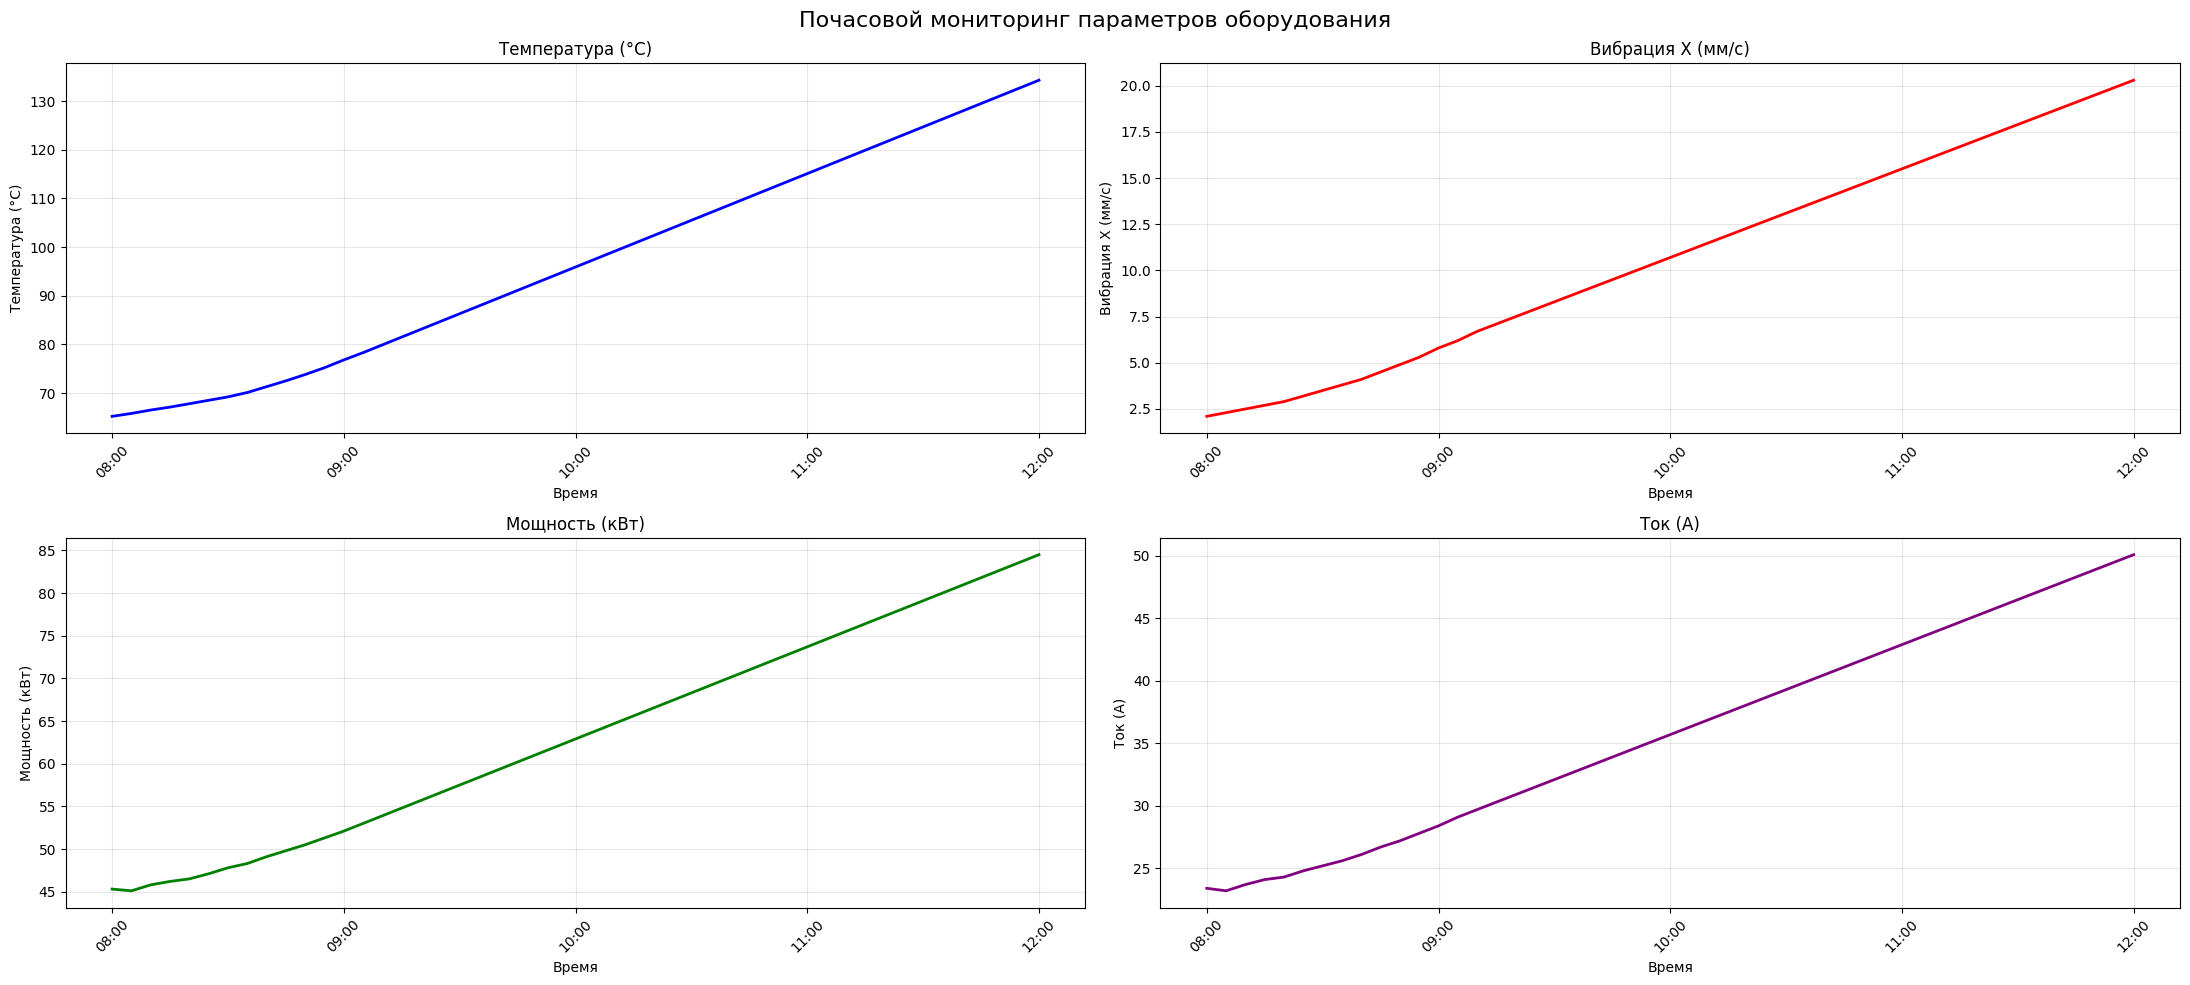

In [17]:
import matplotlib.dates as mdates
from matplotlib.dates import HourLocator, DateFormatter

fig, axes = plt.subplots(2, 2, figsize=(22, 10))
axes = axes.flatten()

parameters = [
    ('Temperature', 'Температура (°C)', 'blue'),
    ('Vibration_X', 'Вибрация X (мм/с)', 'red'),
    ('Power_Consumption', 'Мощность (кВт)', 'green'),
    ('Motor_Current', 'Ток (А)', 'purple')
]

for i, (param, label, color) in enumerate(parameters):
    axes[i].plot(df.index, df[param], color=color, linewidth=2)
    axes[i].set_ylabel(label, fontsize=10)
    axes[i].set_xlabel('Время', fontsize=10)
    axes[i].set_title(f'{label}', fontsize=12)
    axes[i].grid(True, alpha=0.3)

    # Устанавливаем почасовые метки
    axes[i].xaxis.set_major_locator(HourLocator(interval=1))
    axes[i].xaxis.set_major_formatter(DateFormatter('%H:%M'))
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Почасовой мониторинг параметров оборудования', fontsize=16)
plt.tight_layout()
plt.show()

### 6. Практические задания
1. Найдите и заполните пропуски разными методами. Сравните результаты.
2. Постройте графики исходных и обработанных рядов.
3. Агрегируйте данные по неделям, кварталам, годам.
4. Подготовьте набор данных для дальнейшего анализа трендов.